## Inferential Visualizations
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, Ridge, 

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer

In [2]:
train = pd.read_csv('../data/train_clean2.csv')
test = pd.read_csv('../data/test_clean2.csv')

In [3]:
data = train[['lot_area', 
           'gr_liv_area', 
           'total_bsmt_sf',  
           'open_porch_sf',  
           'bedroom_abvgr', 
           'full_bath', 
           'half_bath', 
           'bsmt_full_bath', 
           'bsmt_half_bath', 
           'totrms_abvgrd', 
           'kitchen_abvgr', 
           'garage_cars', 
           'year_built', 
           'year_remod/add', 
           'mo_sold', 
           'yr_sold', 
           'exter_cond', 
           'bsmt_cond', 
           'central_air', 
           'heating', 
           'overall_cond', 
           'overall_qual',
              'neighborhood']]


In [4]:
df = pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lot_area        2049 non-null   int64  
 1   gr_liv_area     2049 non-null   int64  
 2   total_bsmt_sf   2049 non-null   float64
 3   open_porch_sf   2049 non-null   int64  
 4   bedroom_abvgr   2049 non-null   int64  
 5   full_bath       2049 non-null   int64  
 6   half_bath       2049 non-null   int64  
 7   bsmt_full_bath  2049 non-null   float64
 8   bsmt_half_bath  2049 non-null   float64
 9   totrms_abvgrd   2049 non-null   int64  
 10  kitchen_abvgr   2049 non-null   int64  
 11  garage_cars     2049 non-null   float64
 12  year_built      2049 non-null   int64  
 13  year_remod/add  2049 non-null   int64  
 14  mo_sold         2049 non-null   int64  
 15  yr_sold         2049 non-null   int64  
 16  exter_cond      2049 non-null   object 
 17  bsmt_cond       1994 non-null   o

## More Cleaning

In [6]:
df.central_air = df.central_air.apply(lambda x: 1 if x == 'Y' else 0)

In [7]:
train[['year_remod/add', 'year_built', 'yr_sold']] = train[['year_remod/add', 'year_built', 'yr_sold']].apply(lambda x: 2010 - x)

In [8]:
def cat_extercond(a_string):
    cats = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    return cats[a_string]

df.exter_cond = df.exter_cond.apply(cat_extercond)

In [16]:
df.bsmt_cond = df.bsmt_cond.fillna('NA')

In [17]:
def cat_bsmtcond(a_string):
    cats = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
    return cats[a_string]

df.bsmt_cond = df.bsmt_cond.apply(cat_bsmtcond)

In [19]:
def cat_heat(a_string):
    cats = {'Floor':6, 'GasA':5, 'GasW':4, 'Grav':3, 'OthW':1, 'Wall':0}
    return cats[a_string]

df.heating = df.heating.apply(cat_heat)

In [21]:
df.dtypes

lot_area            int64
gr_liv_area         int64
total_bsmt_sf     float64
open_porch_sf       int64
bedroom_abvgr       int64
full_bath           int64
half_bath           int64
bsmt_full_bath    float64
bsmt_half_bath    float64
totrms_abvgrd       int64
kitchen_abvgr       int64
garage_cars       float64
year_built          int64
year_remod/add      int64
mo_sold             int64
yr_sold             int64
exter_cond          int64
bsmt_cond           int64
central_air         int64
heating             int64
overall_cond        int64
overall_qual        int64
neighborhood       object
dtype: object

In [62]:
df = pd.get_dummies(df, columns=['neighborhood'])

## Model

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

In [81]:
pipe = Pipeline(steps=[("ss", StandardScaler()), 
                       ("ridge", Ridge())])

In [82]:
pipe

Pipeline(steps=[('ss', StandardScaler()), ('ridge', Ridge())])

In [83]:
X = df
y = train['saleprice']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('ridge', Ridge())])

In [90]:
params = {'alpha': np.logspace(0,4,50)}
ridge_grid = GridSearchCV(pipe.named_steps["ridge"], param_grid=params, n_jobs=-1)
ridge_grid.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e+00, 1.20679264e+00, 1.45634848e+00, 1.75751062e+00,
       2.12095089e+00, 2.55954792e+00, 3.08884360e+00, 3.72759372e+00,
       4.49843267e+00, 5.42867544e+00, 6.55128557e+00, 7.90604321e+00,
       9.54095476e+00, 1.15139540e+01, 1.38949549e+01, 1.67683294e+01,
       2.02358965e+01, 2.44205309e+01, 2.94705170e+...
       9.10298178e+01, 1.09854114e+02, 1.32571137e+02, 1.59985872e+02,
       1.93069773e+02, 2.32995181e+02, 2.81176870e+02, 3.39322177e+02,
       4.09491506e+02, 4.94171336e+02, 5.96362332e+02, 7.19685673e+02,
       8.68511374e+02, 1.04811313e+03, 1.26485522e+03, 1.52641797e+03,
       1.84206997e+03, 2.22299648e+03, 2.68269580e+03, 3.23745754e+03,
       3.90693994e+03, 4.71486636e+03, 5.68986603e+03, 6.86648845e+03,
       8.28642773e+03, 1.00000000e+04])})

In [91]:
yhat = ridge_grid.predict(X_test)

In [92]:
mean_squared_error(y_test, yhat, squared=False)

28401.548799451288

In [93]:
ridge_grid.score(X_test, y_test)

0.8755206293610706

## Visualizations

In [337]:
yhats = list(yhat)

In [350]:
preds = pd.DataFrame(yhats)
preds['value'] = "prediction"

In [344]:
preds

,0,value
0,105911.941203,prediction
1,379432.800714,prediction
2,118365.400207,prediction
3,132616.915397,prediction
4,118095.769979,prediction
...,...,...
672,330916.974228,prediction
673,112411.642679,prediction
674,110342.914942,prediction
675,181148.469740,prediction


In [352]:
test = pd.DataFrame(y_test)
test['value'] = "test"

In [355]:
test.merge(preds, how='inner')

,saleprice,value,0


In [ ]:
sns.scatterplot()

In [98]:
coefs = ridge_grid.best_estimator_.coef_

In [104]:
meep = dict(zip(X_train.columns, coefs))
meep = {k: v for k, v in sorted(meep.items(), key=lambda item: item[1])}

## Neighborhoods with Lower Sale Prices

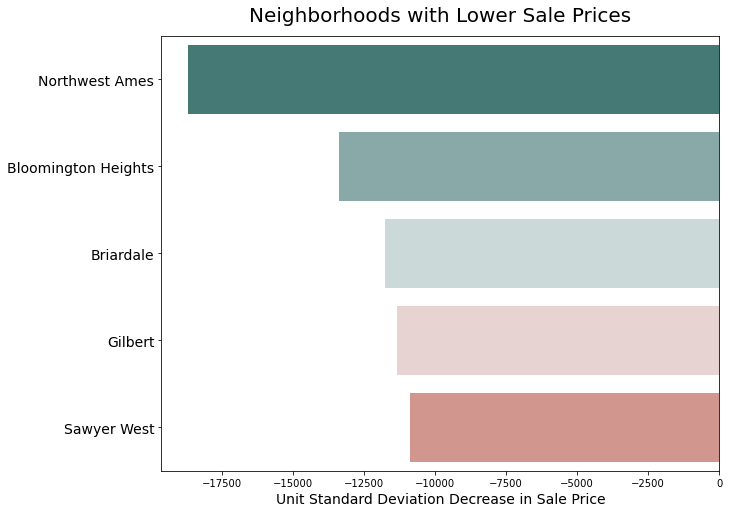

In [320]:
df_where = pd.DataFrame({k:v for k,v in meep.items() if 'neighborhood' in k}.items())

plt.figure(figsize=(10, 8))

bottom5_hoods = sns.barplot(x=1, y=0, data=df_where[:5], orient='h', palette=sns.diverging_palette(185, 16))

bottom5_hoods.set_xlabel('Unit Standard Deviation Decrease in Sale Price', fontsize=14)
bottom5_hoods.set_yticklabels(['Northwest Ames', 'Bloomington Heights', 'Briardale', 'Gilbert', 'Sawyer West'], fontsize=14)
bottom5_hoods.set_ylabel('')
bottom5_hoods.set_title('Neighborhoods with Lower Sale Prices', fontsize=20, y=1.02);

## Neighborhoods with Higher Sale Prices

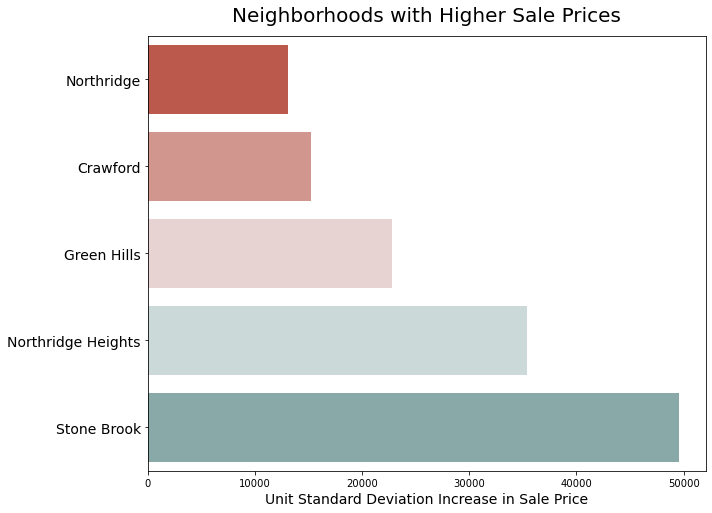

In [318]:
df_where = pd.DataFrame({k:v for k,v in meep.items() if 'neighborhood' in k}.items())

plt.figure(figsize=(10, 8))

top5_hoods = sns.barplot(x=1, y=0, data=df_where[-5:], orient='h', palette=sns.diverging_palette(16, 185))

top5_hoods.set_xlabel('Unit Standard Deviation Increase in Sale Price', fontsize=14)
top5_hoods.set_yticklabels(['Northridge', 'Crawford', 'Green Hills', 'Northridge Heights', 'Stone Brook'], fontsize=14)
top5_hoods.set_ylabel('')
top5_hoods.set_title('Neighborhoods with Higher Sale Prices', fontsize=20, y=1.02);

## Top 5 Home Features

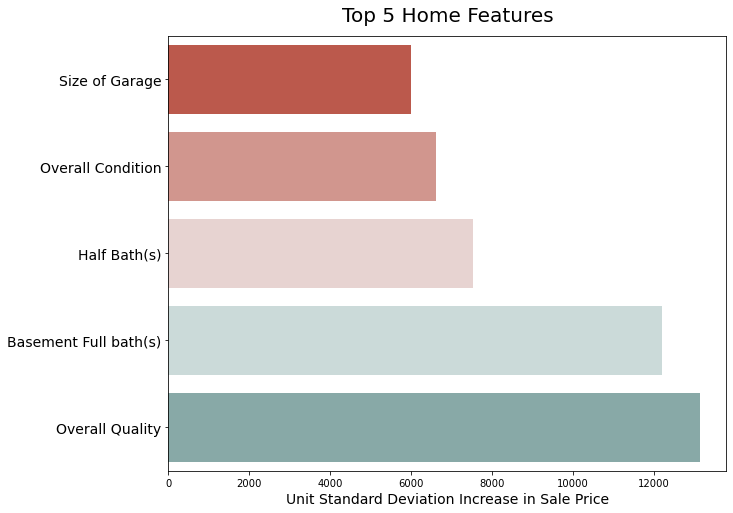

In [317]:
plt.figure(figsize=(10, 8))

df_how = pd.DataFrame({k:v for k,v in meep.items() if 'neighborhood' not in k}.items())

top5_feats = sns.barplot(x=1, y=0, data=df_how[-5:], orient='h', palette=sns.diverging_palette(16, 185))

top5_feats.set_xlabel('Unit Standard Deviation Increase in Sale Price', fontsize=14)
top5_feats.set_yticklabels(['Size of Garage', 'Overall Condition', 'Half Bath(s)', 'Basement Full bath(s)', 'Overall Quality'], fontsize=14)
top5_feats.set_ylabel('')
top5_feats.set_title('Top 5 Home Features', fontsize=20, y=1.02);

overal quality and finish of the house matters more than the overall condition of the house

where to put the good stuff? the bathrooms (use the model of the full data set to say more) 

## Top 5 Least Impactful Home Features

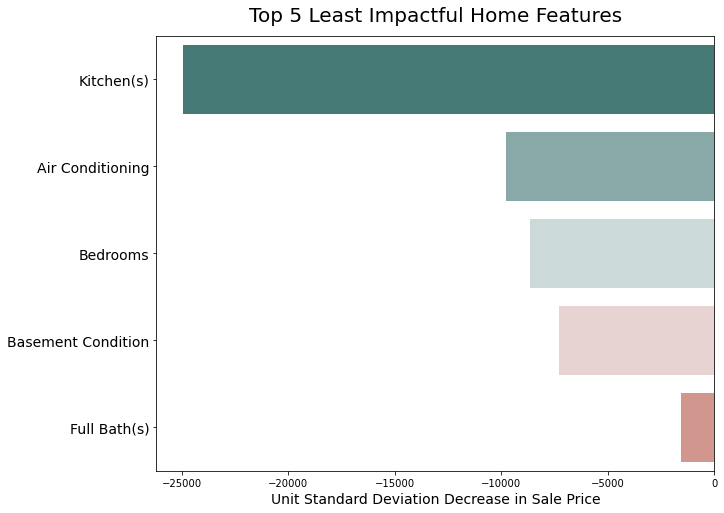

In [316]:
plt.figure(figsize=(10, 8))

df_how = pd.DataFrame({k:v for k,v in meep.items() if 'neighborhood' not in k}.items())

bottom5_feats = sns.barplot(x=1, y=0, data=df_how[:5], orient='h', 
                            palette=sns.diverging_palette(185, 16))

bottom5_feats.set_xlabel('Unit Standard Deviation Decrease in Sale Price', fontsize=14)
bottom5_feats.set_yticklabels(['Kitchen(s)', 'Air Conditioning', 'Bedrooms', 'Basement Condition', 'Full Bath(s)'], fontsize=14)
bottom5_feats.set_ylabel('')
bottom5_feats.set_title('Top 5 Least Impactful Home Features', fontsize=20, y=1.02);

In [57]:
kaggle_train = pd.read_csv('../data/kaggle_train.csv')
kaggle_test = pd.read_csv('../data/kaggle_test.csv')

In [ ]:
ridge_grid.fit(X_train,y_train)